In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import networkx as nx

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('/Users/eoinkeaney/Desktop/Cap_Stone_Data/full_final_comment_ver_1_30-4-2021.csv')

In [7]:
G1 = df[['name','parent_id','author']].copy()

In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'id.1', 'name', 'score', 'parent_id', 'depth',
       'body', 'author', 'created_utc', 'subreddit_name_prefixed', 'date',
       'body_lenght_full', 'processed_quote', 'tokenised_quotes',
       'objectivity_avg', 'polarity_avg', 'vader_compound', 'vader_neg',
       'vader_neu', 'vader_pos', 'google_name', 'google_sentiment_score',
       'google_sentiment_magnitude', 'whatson_name', 'whatson_sentiment_score',
       'whatson_sentiment_label', 'child_id', 'child_id.1', 'child_name',
       'child_score', 'child_parent_id', 'child_depth', 'child_body',
       'child_author', 'child_created_utc', 'child_subreddit_name_prefixed',
       'child_date', 'child_body_lenght_full', 'child_processed_quote',
       'child_tokenised_quotes', 'child_objectivity_avg', 'child_polarity_avg',
       'child_vader_compound', 'child_vader_neg', 'child_vader_neu',
       'child_vader_pos', 'child_google_name', 'child_google_sentiment_score',
       'child_google_sentiment_magnit

In [8]:
G2 = G1.copy()

In [9]:
G1.set_index('name',inplace=True,drop=False)

In [10]:
G2.set_index('parent_id',inplace=True,drop=False)

In [13]:
G2.rename(columns={x:f'child_{x}' for x in G2.columns},inplace=True)

In [14]:
G2.head(3)

child_name child_parent_id   child_author
parent_id                                           
t3_ehulb1  t1_fcllq9v       t3_ehulb1  AutoModerator
t3_ehulqf  t1_fclm7x0       t3_ehulqf   UnaNuovaIdea
t3_ehulqf  t1_fclmmr1       t3_ehulqf      miuipixel

In [15]:
df2 = G1.merge(G2,left_index=True, right_index=True)

In [16]:
df2.shape

(360259, 6)

In [17]:
df2.columns

Index(['name', 'parent_id', 'author', 'child_name', 'child_parent_id',
       'child_author'],
      dtype='object')

In [18]:
df2.head(2)

name  parent_id     author  child_name child_parent_id  \
t1_fclmmr1  t1_fclmmr1  t3_ehulqf  miuipixel  t1_fclmtqi      t1_fclmmr1   
t1_fcln3q0  t1_fcln3q0  t3_ehulqf        NaN  t1_fclnn4j      t1_fcln3q0   

           child_author  
t1_fclmmr1      Pacwhat  
t1_fcln3q0      Pacwhat

In [38]:
df_r = df2.groupby(['author','child_author'],as_index=False)['name'].count()

In [40]:
df_r.iloc[0:10]

author          child_author  name
0   ---athena---                IanT86     1
1   ---athena---            Leemhero69     1
2       --Bamboo         Happy_Craft14     1
3       --Bamboo  ThinkAboutThatFor1Se     2
4       --Bamboo                aslate     1
5       --Bamboo     ilikeavocadotoast     1
6  --ClickHere--                Petaaa     2
7  --ClickHere--         Zerocool10110     2
8      --Thyme--      mattie-muddle-97     2
9      --_--__--          ShitpeasCunk     1

In [41]:
G = nx.DiGraph()

In [43]:
for x in df_r.iterrows():
    G.add_edge(x[1].author, x[1].child_author, weight=x[1].name)


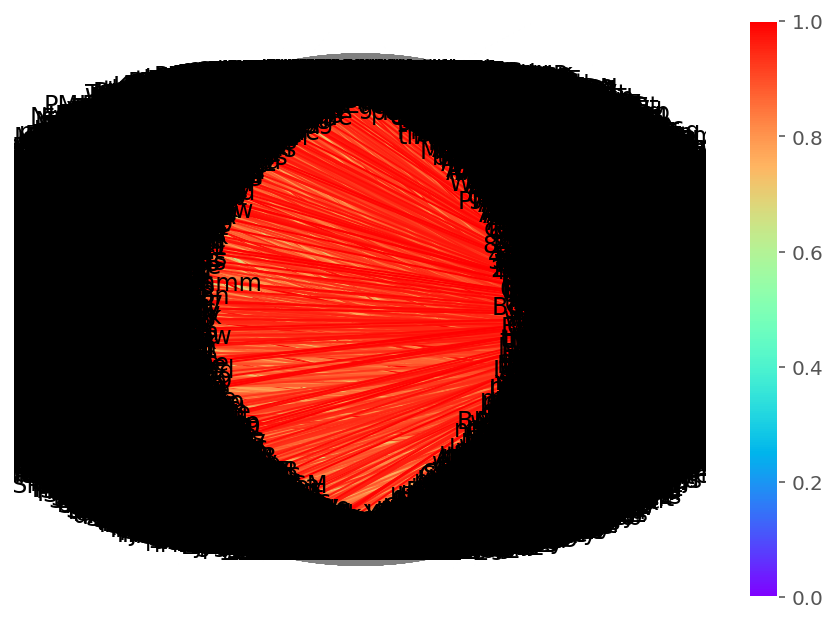

In [44]:
fig, ax = plt.subplots(figsize=(16, 12))
positions = nx..drawing.spring_layout(G)
cmap_edges = cm.get_cmap('rainbow')
edge_weights = [e[2]['weight'] for e in G.edges(data=True)]

nx.draw(G, pos=positions, node_color='grey', with_labels=False, node_size=5
        edge_color=edge_weights, edge_cmap=cmap_edges)

# code for adding a colour bar, colour range normalised to [0,1]
vmin = 0
vmax = 1
sm = plt.cm.ScalarMappable(
    cmap=cmap_edges, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)

plt.show()

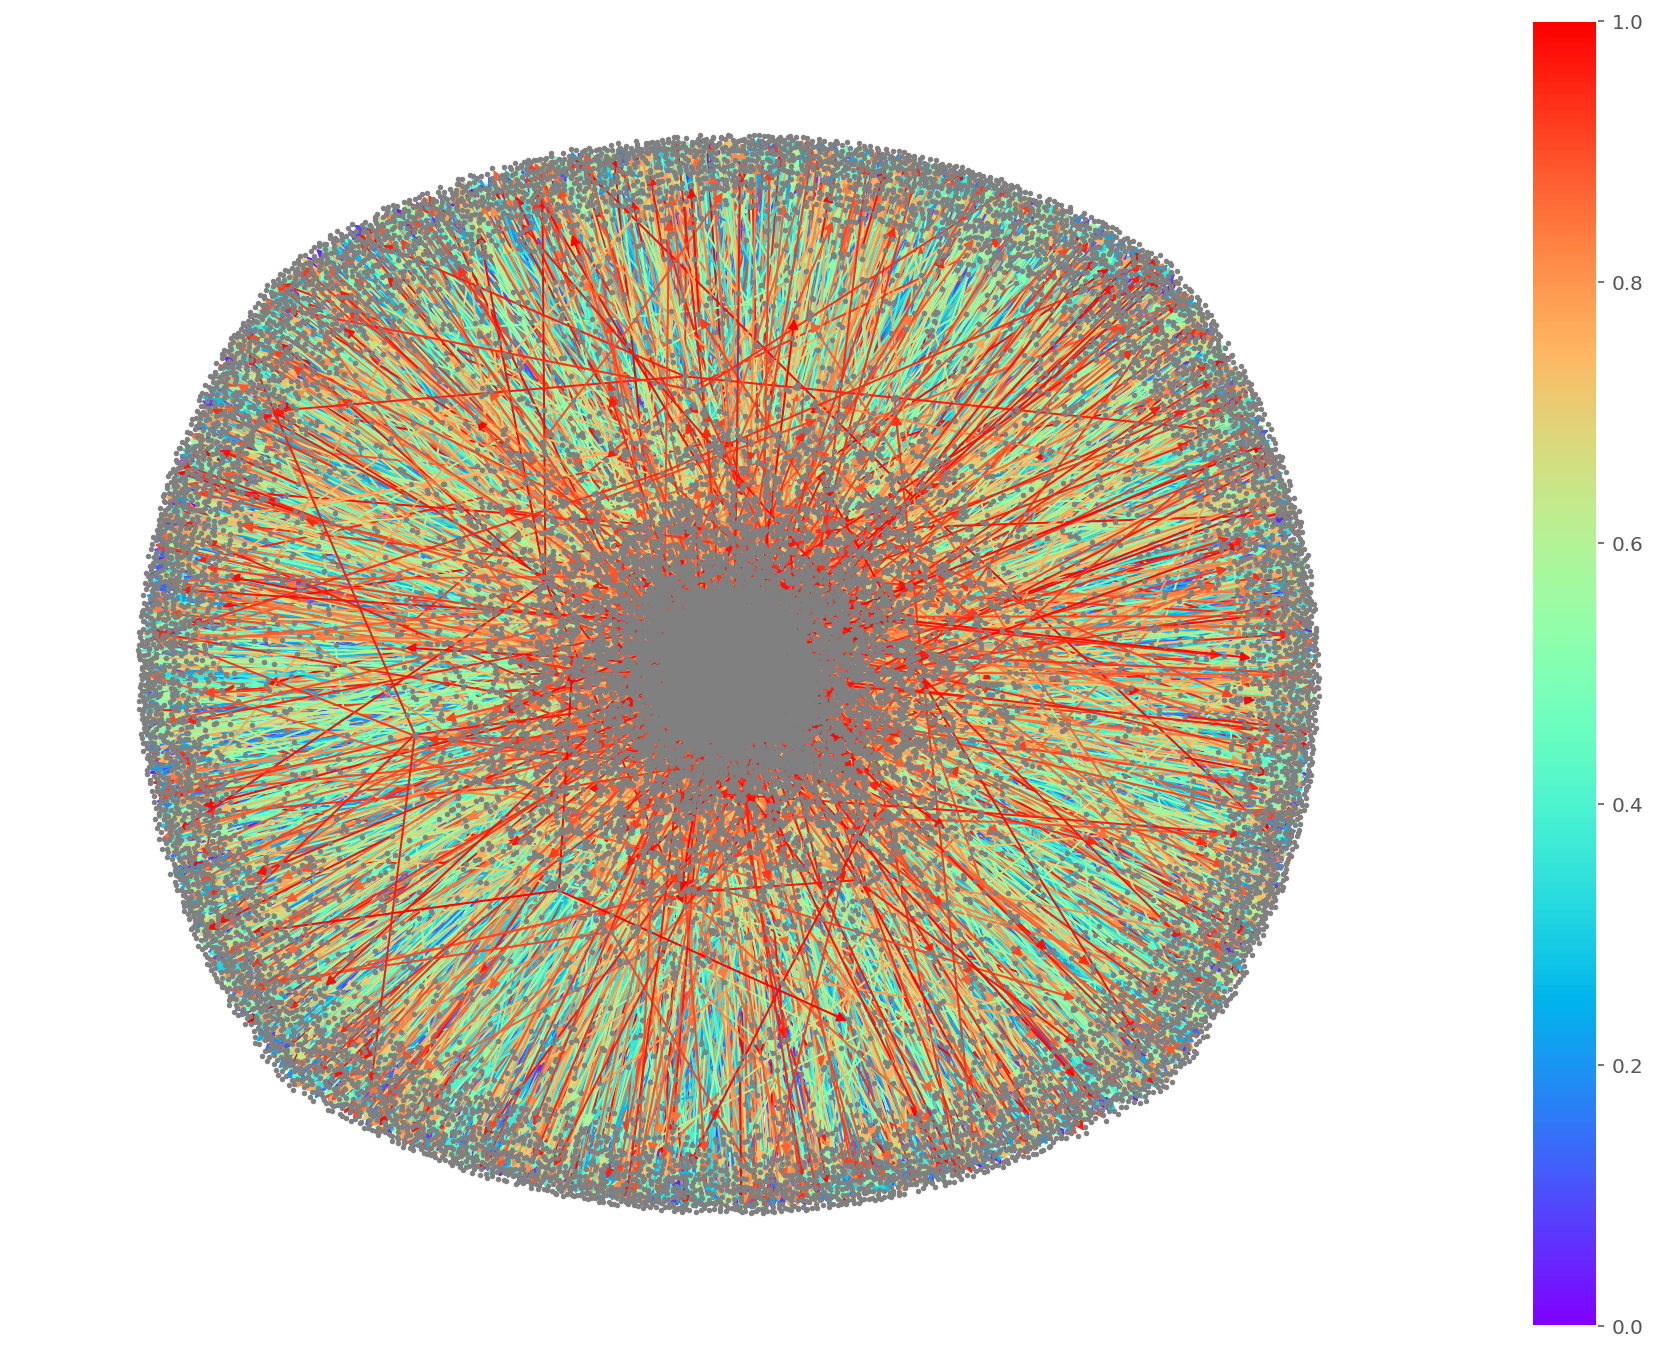

In [47]:
fig, ax = plt.subplots(figsize=(16, 12))
positions = nx.drawing.spring_layout(G)
cmap_edges = cm.get_cmap('rainbow')
edge_weights = [e[2]['weight'] for e in G.edges(data=True)]

nx.draw(G, pos=positions, node_color='grey', with_labels=False, node_size=5,
        edge_color=edge_weights, edge_cmap=cmap_edges)

# code for adding a colour bar, colour range normalised to [0,1]
vmin = 0
vmax = 1
sm = plt.cm.ScalarMappable(
    cmap=cmap_edges, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)

plt.show()

In [49]:
len(G)

37066

In [54]:
from random import sample
random_nodes = sample(list(G.nodes()), 5000)
sampled_graph = G.subgraph(random_nodes)

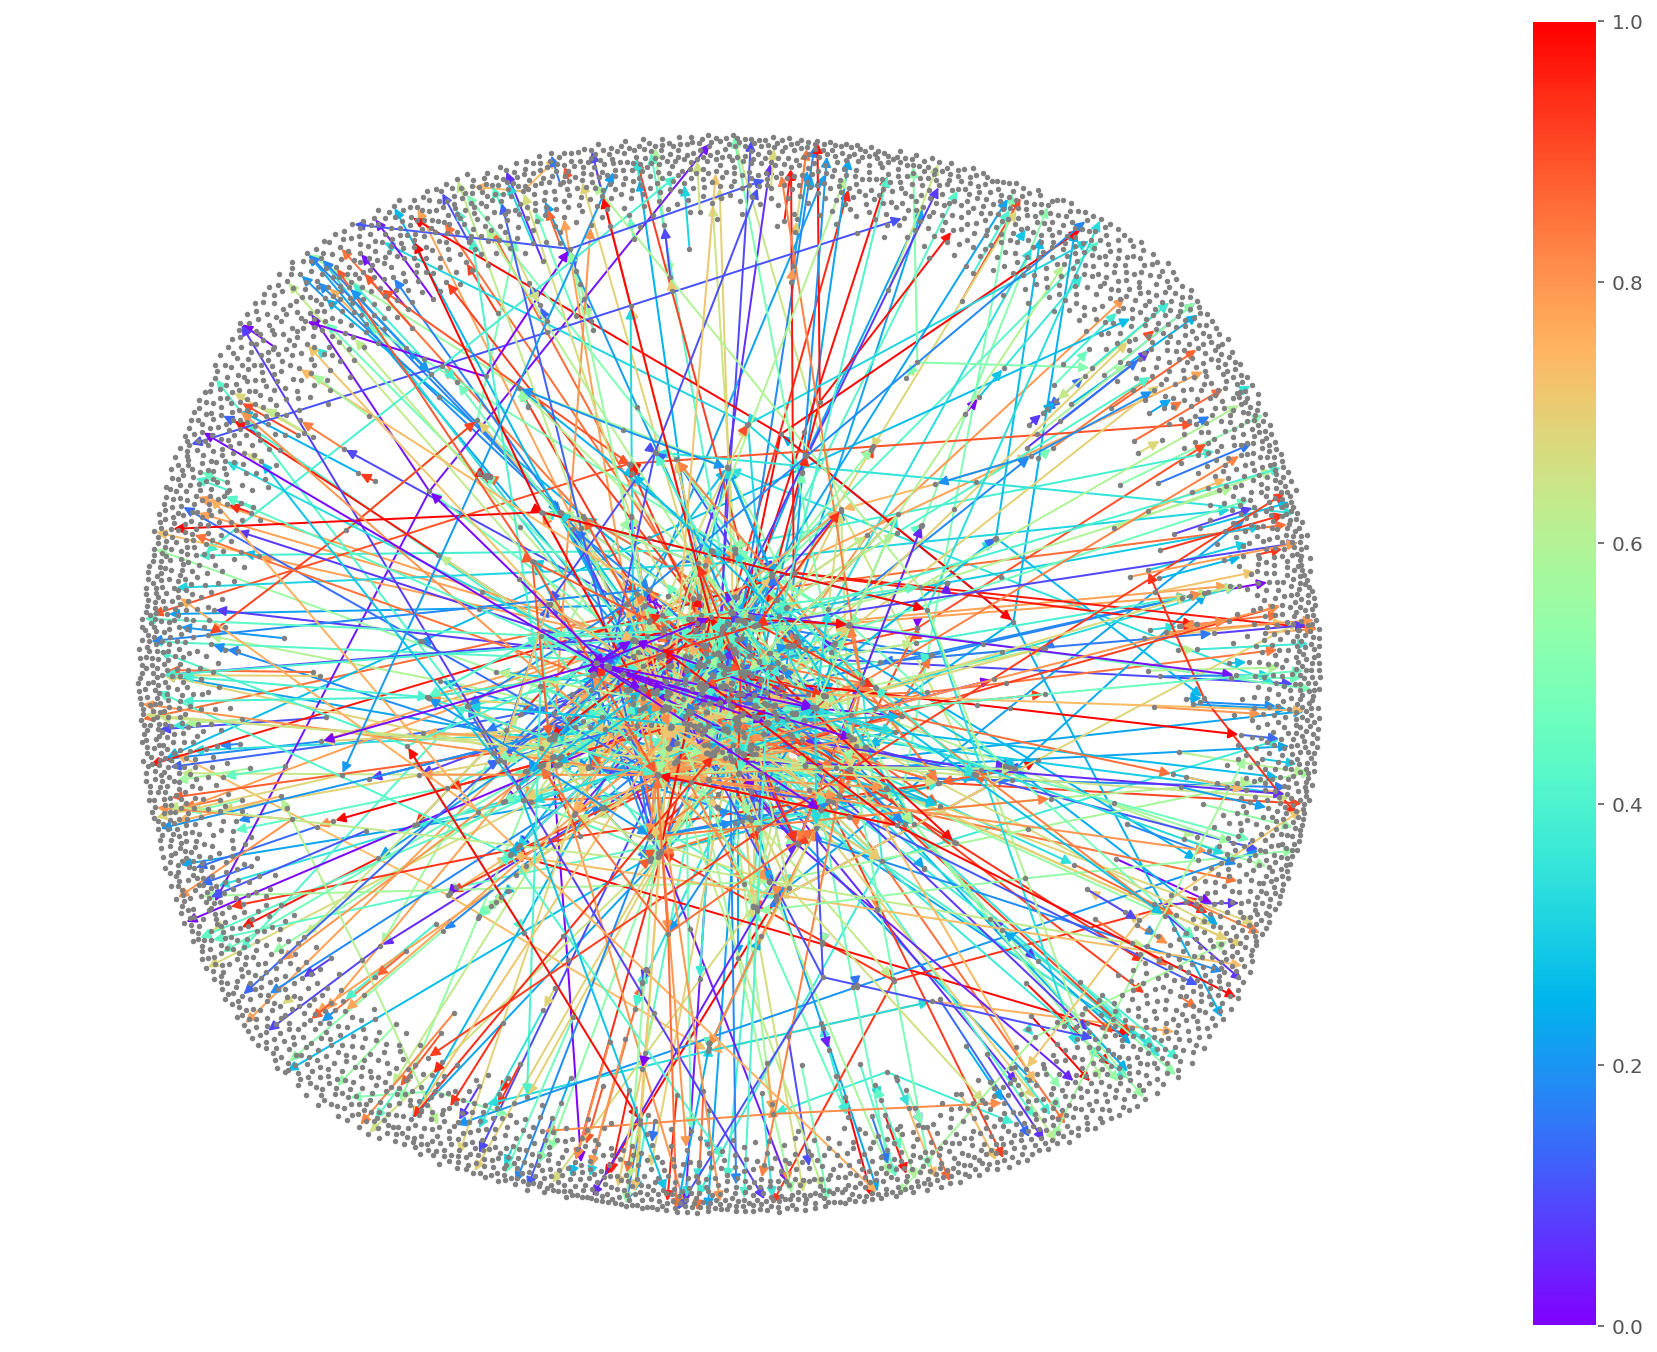

In [55]:
fig, ax = plt.subplots(figsize=(16, 12))
positions = nx.drawing.spring_layout(sampled_graph)
cmap_edges = cm.get_cmap('rainbow')
edge_weights = [e[2]['weight'] for e in sampled_graph.edges(data=True)]

nx.draw(sampled_graph, pos=positions, node_color='grey', with_labels=False, node_size=5,
        edge_color=edge_weights, edge_cmap=cmap_edges)

# code for adding a colour bar, colour range normalised to [0,1]
vmin = 0
vmax = 1
sm = plt.cm.ScalarMappable(
    cmap=cmap_edges, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)

plt.show()

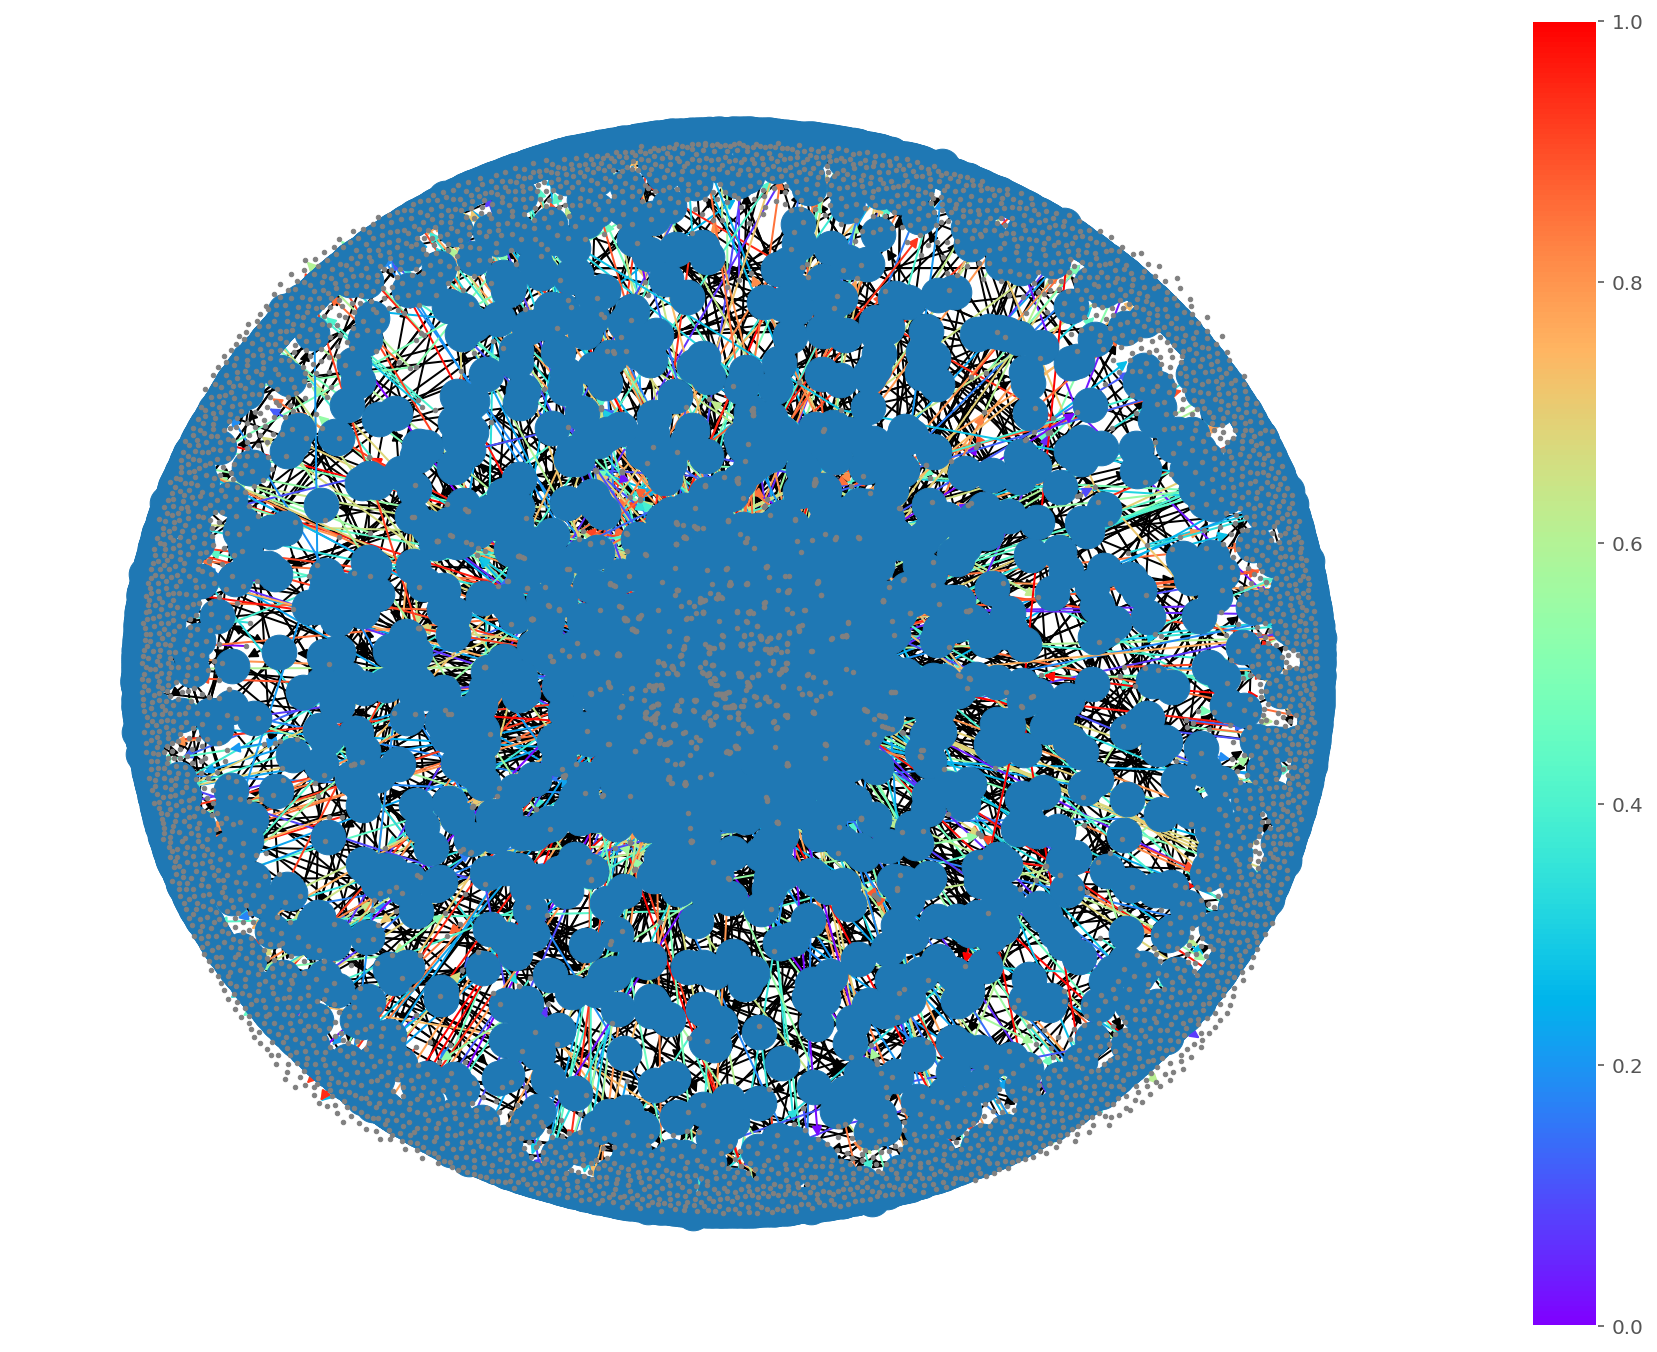

In [56]:
fig, ax = plt.subplots(figsize=(16, 12))
positions = nx.drawing.draw_kamada_kawai(sampled_graph)
cmap_edges = cm.get_cmap('rainbow')
edge_weights = [e[2]['weight'] for e in sampled_graph.edges(data=True)]

nx.draw(sampled_graph, pos=positions, node_color='grey', with_labels=False, node_size=5,
        edge_color=edge_weights, edge_cmap=cmap_edges)

# code for adding a colour bar, colour range normalised to [0,1]
vmin = 0
vmax = 1
sm = plt.cm.ScalarMappable(
    cmap=cmap_edges, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)

plt.show()

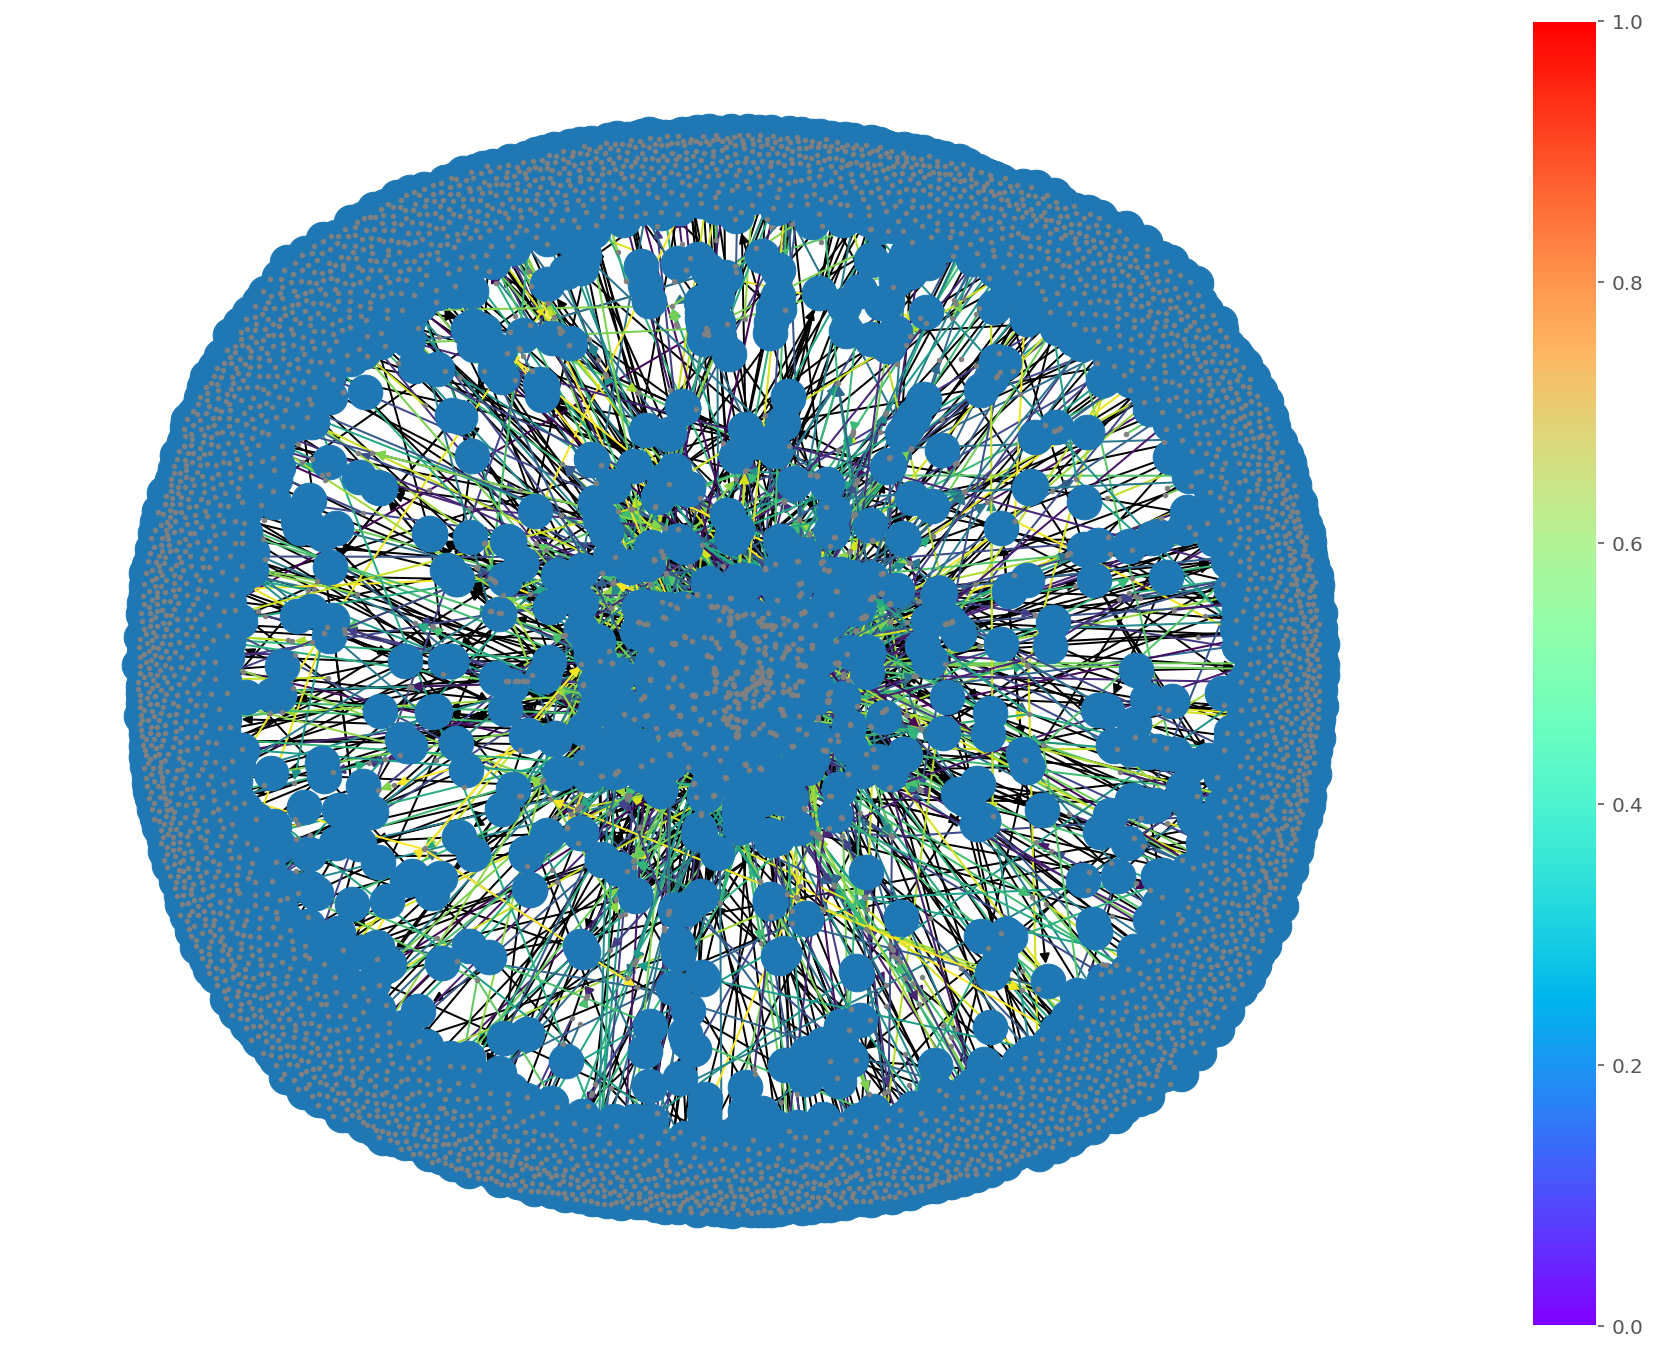

In [58]:
fig, ax = plt.subplots(figsize=(16, 12))
positions = nx.drawing.draw_spring(sampled_graph)
cmap_edges = cm.get_cmap('rainbow')
edge_weights = [e[2]['weight'] for e in sampled_graph.edges(data=True)]

nx.draw(sampled_graph, pos=positions, node_color='grey', with_labels=False, node_size=5,
        edge_color=edge_weights)

# code for adding a colour bar, colour range normalised to [0,1]
vmin = 0
vmax = 1
sm = plt.cm.ScalarMappable(
    cmap=cmap_edges, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)

plt.show()